## Estimation the energy of *Trinity* test explosion

> *Trinity* was the code name of the first detonation of a nuclear weapon, conducted on July 16, 1945, as part of the Manhattan Project.

In this notes we estimate the energy released in the *Trinity* test explosion from the obsevational data
gathered from public sources back in 1949, when the energy yield was still classified information.

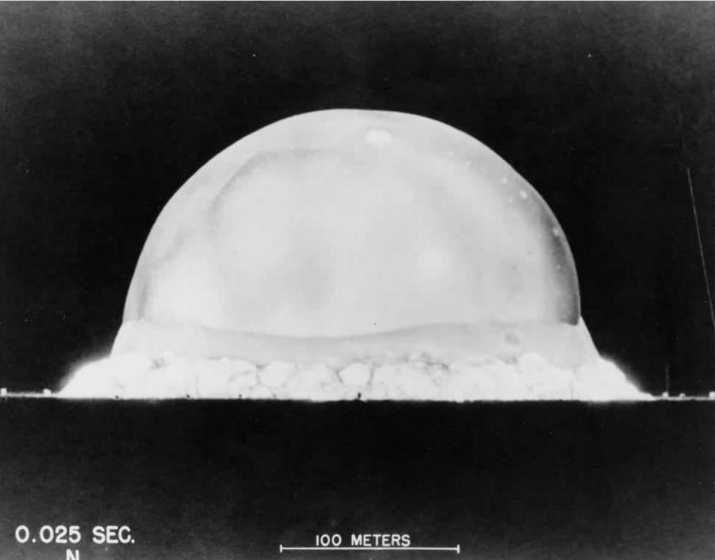

A photograph of *Trinity* explosion, 25 ms after detonation.

To determine the time dependence of the radius of a fireball, one needs to solve the equations describing 
the conservation of momentum, mass, and energy, and the equation of state of the hot gas inside the ball. 
The result is that the radius of the ball $R(t)$ is related to
the energy of the explosion $E$, the density of air $\rho_{\mathrm{air}}$, and time $t$ through the relation
$$R(t) = 𝐸^{\frac{1}{5}} \, \rho_{\mathrm{air}}^{-\frac{1}{5}} \, t^{\frac{2}{5}}$$.

Taking the density of air at the time and altitude of the test to be $\rho_{\mathrm{air}} = 1.2 \; \mathrm{kg/m}^3$, 
we estimate the yield of the Trinity nuclear explosion. We state the answer both in Joules and in kilotons of
TNT, where the energy released by 1 kiloton of TNT is $4.184 \times 10^{12}$J.

In [ ]:

# ] add DelimitedFiles

In [ ]:

using DelimitedFiles
using PyPlot

In [ ]:

url = "https://www.phys.uconn.edu/~rozman/Courses/P2200_25F/downloads/trinity-test.data"

In [ ]:

obsevations = download(url)  # Download the data to a temporary file

In [ ]:

dat = readdlm(obsevations, comments=true, comment_char='#')  # Read the data from the temporary file, ignore comments

In [ ]:

time = dat[:, 1]     # time in ms

In [ ]:

radius = dat[:, 2]   # radius in m

In [ ]:

np = length(time)    # number of data points

Let's plot the data in double logarithmic axes:

In [ ]:

loglog(time, radius, "bo", label="observations")
grid(true)
xlabel("t (ms)")
ylabel("R (m)")
legend()
title("Trinity fireball radius as a function of time");

$$\log(R) = \log(𝐸^{\frac{1}{5}} \, \rho_{\mathrm{air}}^{-\frac{1}{5}}) +  \frac{2}{5} \log(t)$$

Let's simplify notations:
$$\alpha = \log(𝐸^{\frac{1}{5}} \, \rho_{\mathrm{air}}^{-\frac{1}{5}}), \qquad
x = \log(t), \qquad y = \log(R), \qquad \beta = \frac{2}{5}.$$
Then, the theory predicts that
$$y = \alpha + \beta x.$$

### Least squares approach to estimation of parameters

Suppose we conduct an experiment where we observe $n$ data pairs and
call them $(x_i, y_i)$, $i = 1, \dots, n$. We want to describe the
underlying relationship between $y_i$ and $x_i$ involving the error of
the measurements, $\varepsilon_i$, by the following relation:

$$y_i = \alpha  + \beta x_i + \varepsilon_i$$ .

Out goal is to find estimated value, $\widehat{\alpha}$
for the parameter $\alpha$ which would
provide the "best" fit in some sense for the data points
$(x_i, y_i)$. We chose the best fit in the *least-squares* sense: the
best-fit line minimizes the sum of squared residuals,
$\widehat{\varepsilon}_i$, which are the differences between measured
and predicted values of the dependent variable y:

$$\widehat{\varepsilon}_i = y_i - \widehat{\alpha} - \beta x_i.$$

That is, we are looking for the value $\widehat{\alpha}$ 
that is the solutions of the following minimization problem:
find $\min_{\widehat{\alpha}} Q(\widehat{\alpha})$,
where

$$Q(\widehat{\alpha}) = \sum_{i=1}^n \widehat{\varepsilon}_i^2 =
  \sum_{i=1}^n \left(y_i - \widehat{\alpha} - \beta x_i\right)^2 .$$  

To find a minimum, we take the derivative of $Q$ with respect to
$\widehat{\alpha}$ and equate it to zero:

$$\frac{\mathrm{d}}{\mathrm{d} \widehat{\alpha}} Q(\widehat{\alpha }) = 
  -2 \sum_{i=1}^n \left(
    y_i - \widehat{\alpha} - \beta x_i
  \right) = 0 ,$$
or

$$\sum_{i=1}^n \left(y_i - \widehat{\alpha} - \beta x_i \right) = 0 .$$

Rearranging the terms, we get

$$\sum_{i=1}^n \widehat{\alpha} =  \sum_{i=1}^n y_i - \beta \sum_{i=1}^n x_i .$$

Since $\sum_{i=1}^n \widehat{\alpha} = n \widehat{\alpha}$,

$$n \widehat{\alpha} = \sum_{i=1}^n y_i  - \beta \sum_{i=1}^n x_i ,$$

or

$$\widehat{\alpha} = \frac{1}{n} \sum_{i=1}^n y_i - \beta \, \left(\frac{1}{n} \sum_{i=1}^n x_i\right) .$$

Introducing $\bar{x}$ and $\bar{y}$, the average
values of the $x_i$ and $y_i$, respectively:

$$\bar{x} \equiv \frac{1}{n} \sum_{i=1}^n x_i, \qquad
  \bar{y} \equiv \frac{1}{n} \sum_{i=1}^n y_i ,$$
  
we obtain:

$$\widehat{\alpha} = \bar{y} - \beta \bar{x} ,$$ 

or

$$\bar{y} = \widehat{\alpha} + \beta \bar{x} .$$

The last relation can be interpreted as follows: the best
fit line passes through the *center of mass* of the data points.

The results of the theory

In [ ]:

const beta = 2 / 5
rad(t, alpha) = alpha * t^beta ;

### Least Squares fit for $\alpha$

In [ ]:

nexcl = 2   # Exclude the first 'nexcl' data points from the analysis
ind = (nexcl+1):np

In [ ]:

tlogbar = sum(log.(time[ind])) / length(ind)

In [ ]:

rlogbar = sum(log.(radius[ind])) / length(ind)

In [ ]:

alphalog = rlogbar - beta * tlogbar

In [ ]:

alpha = exp(alphalog)
println("α = $(round(alpha, sigdigits=4))")

In [ ]:

loglog(time, radius, "bo", label="observations")
loglog(time, rad.(time, alpha), "-", label="theory")

grid(true)
xlabel("t (ms)")
ylabel("R(t) (m)")
title("Trinity fireball radius as a function of time")
legend();

### Estimate the energy of explosion in J and the equivalent amount of TNT 

In [ ]:

const scale = 1.0e6   # Extra factor due to measuring time in ms
const rho = 1.2       # Density of air in kg/m^3 at T = 20 C
const tnt = 4.184e12; # J per 1 kt of TNT

In [ ]:

energyJ = scale * alpha^5 * rho 
println("E = $(round(energyJ, sigdigits=3)) Joules")

In [ ]:

energyT = energyJ / tnt  # Equivalent amount of TNT in kilotons
println("E = $(round(energyT, sigdigits=3)) kilotons of TNT")